This dataset contains detailed information about medical costs for individuals over the period from 2010 to 2020. It includes various attributes such as age, sex, BMI, number of children, smoking status, and region. These attributes are essential in understanding the factors that influence medical costs and can be used for predictive modeling, statistical analysis, and research purposes.

Dataset Features:
Age: The age of the individual (ranging from 18 to 65 years).
Sex: Gender of the individual (male or female).
BMI: Body Mass Index of the individual, indicating the level of obesity (ranging from 15 to 40).
Children: Number of children covered by health insurance (ranging from 0 to 5).
Smoker: Smoking status of the individual (yes or no).
Region: Residential area in the US (northeast, northwest, southeast, southwest).
Medical Cost: Annual medical costs incurred by the individual (in USD).

This dataset is a comprehensive collection of 10,000 records, providing a robust foundation for various data analysis tasks. It is especially useful for data scientists, researchers, and students who aim to explore and predict medical costs based on different demographic and lifestyle factors.


In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [120]:
df=pd.read_csv("C:\\Users\\thris\\Downloads\\medical_costs.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [121]:
df.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [123]:
df.shape

(10000, 7)

EDA

In [124]:
fig=px.box(df,x="Age")
fig.show()

Rice criterion
A good criterion to choose the best number of bins k is Rice criterion. It relies on this formula:
k=2 cube root of n
As we can see, it depends on the number n of the points of our dataset. The higher the number of the points, the higher the number of the bins in order to better represent the distribution. The use of the root ensures that this number doesn’t increase too much.

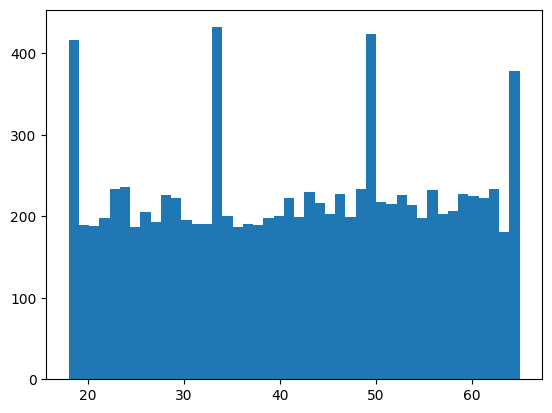

In [125]:
plt.hist(df.Age,bins="rice")
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

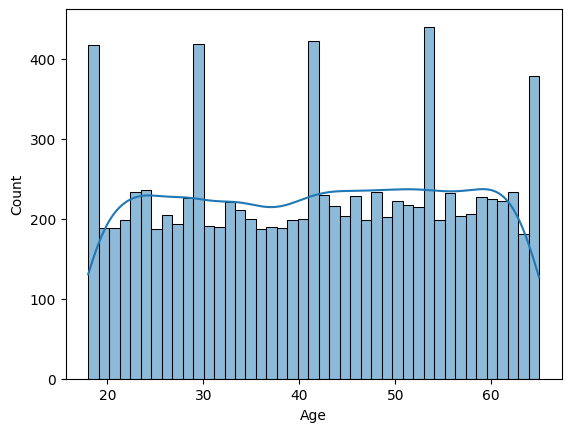

In [126]:
sns.histplot(x=df.Age,bins=43,kde=True)

MULTIMODAL DISTRIBUTION

 a multimodal distribution is a probability distribution with more than one mode (i.e., more than one local peak of the distribution)

Text(0.5, 1.0, 'Distribution of Age per Sex')

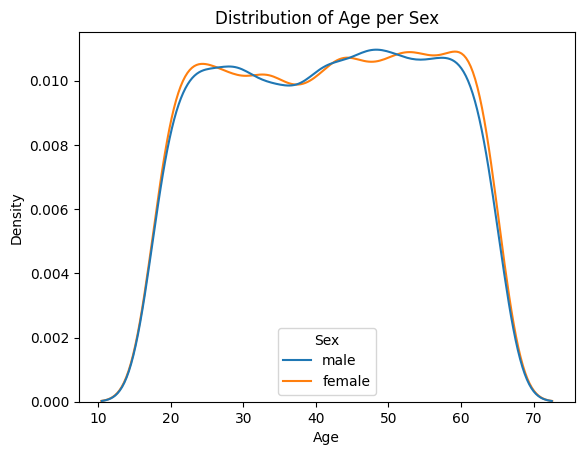

In [127]:
sns.kdeplot(x="Age", hue="Sex", data=df)
plt.title("Distribution of Age per Sex")

In [128]:
d1=df["Sex"].value_counts().reset_index(name="count")

f=px.bar(d1,x="Sex",y="count",color="Sex",title="No. of female and male")
f.update_traces(texttemplate='%{y}',textposition="inside")
f.show()

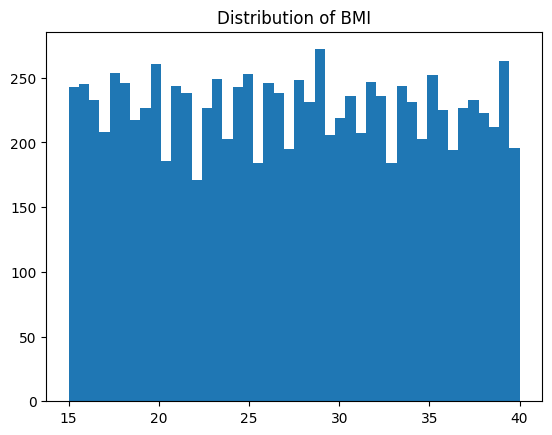

In [129]:
plt.hist(x=df["BMI"],bins='rice')
plt.title("Distribution of BMI")
plt.show()

Text(0.5, 1.0, 'Distribution of BMI per Sex')

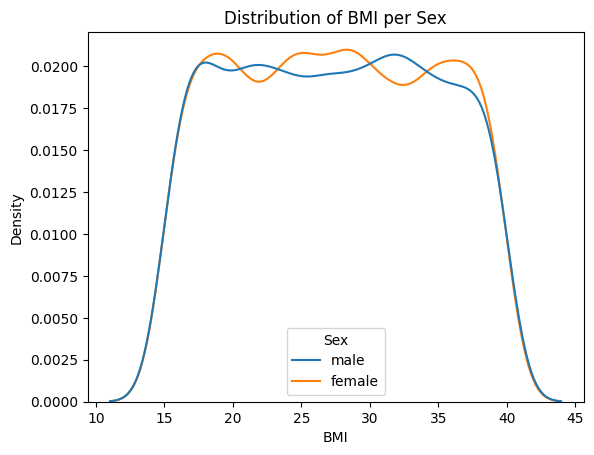

In [130]:
sns.kdeplot(x="BMI", hue="Sex", data=df)
plt.title("Distribution of BMI per Sex")

In [131]:
d2=df["Children"].value_counts().sort_values(ascending=False).reset_index(name="count")

fig=px.bar(d2,x="Children",y="count",title="Distribution of total number of childern")
fig.update_traces(texttemplate='%{y}',textposition="inside")
fig.show()

In [132]:
d3=df["Smoker"].value_counts().reset_index(name="cont")

fx=px.pie(d3,names="Smoker",values="cont",title="Percentage of smokers")
fx.show()

In [133]:
d4=df["Region"].value_counts().reset_index(name='cont')
fx=px.bar(d4,x="Region",y="cont",color="Region",title="Distribution of region")
fx.update_traces(texttemplate='%{y}',textposition="inside")
fx.show()

In [134]:
d5=df.groupby("Region")["Sex"].value_counts().reset_index(name="count")

fig=px.bar(d5,x="Region",y="count",color="Sex",title="Nmmber of male/female per region")
fig.update_traces(texttemplate='%{y}',textposition="inside",textfont=dict(size=14, color="black", family="Arial"))
fig.show()

Female are more from all region except southwest where male patients are high

In [135]:
d6=df.groupby(["Region","Sex"])["Smoker"].value_counts().reset_index(name="count")
d6

,Region,Sex,Smoker,count
0,northeast,female,no,636
1,northeast,female,yes,624
2,northeast,male,yes,634
3,northeast,male,no,620
4,northwest,female,yes,635
5,northwest,female,no,625
6,northwest,male,no,630
7,northwest,male,yes,596
8,southeast,female,yes,648
9,southeast,female,no,608


In [136]:
fig = px.bar(d6, x="Region", y="count", color="Smoker", barmode='stack', facet_col="Sex",
             title="Count of Smokers and Non-Smokers by Region and Sex")
fig.update_traces(texttemplate='%{y}', textposition="inside", textfont=dict(size=14, color="black", family="Arial"))

fig.show()

In [137]:
fig=px.box(df,x="Region",y="Medical Cost",color="Sex")
fig.show()

In [138]:
fig=px.box(df,x="Region",y="Medical Cost",color="Smoker")
fig.show()

Whats the average bmi of a smoker?

In [139]:
df.groupby(["Smoker","Sex"])["BMI"].mean()

Smoker  Sex   
no      female    27.375020
        male      27.424900
yes     female    27.467738
        male      27.343406
Name: BMI, dtype: float64

What is the avg bmi per region?

In [140]:
df.groupby(["Region"])["BMI"].mean()

Region
northeast    27.701710
northwest    27.333427
southeast    27.210367
southwest    27.363189
Name: BMI, dtype: float64

In [141]:
df.groupby(["Region","Sex","Smoker"])["BMI"].mean()

Region     Sex     Smoker
northeast  female  no        27.692767
                   yes       27.958654
           male    no        28.044516
                   yes       27.122555
northwest  female  no        27.331520
                   yes       27.400472
           male    no        26.947460
                   yes       27.671980
southeast  female  no        27.196217
                   yes       27.280864
           male    no        27.042226
                   yes       27.317647
southwest  female  no        27.272403
                   yes       27.235237
           male    no        27.662559
                   yes       27.279841
Name: BMI, dtype: float64

In [142]:
df.groupby("Age")["BMI"].mean().sort_values(ascending=False).head(10)

Age
38    28.838095
57    28.783744
64    28.450000
21    28.237234
44    28.156019
23    28.053648
31    28.030890
30    27.962245
56    27.960345
55    27.925758
Name: BMI, dtype: float64

In [143]:
df.groupby("Sex")["Medical Cost"].mean()

Sex
female    11917.710896
male      11879.896398
Name: Medical Cost, dtype: float64

In [144]:
df.groupby(["Region","Sex"])["Medical Cost"].mean()

Region     Sex   
northeast  female    11869.752841
           male      11959.352201
northwest  female    11976.010405
           male      11736.812088
southeast  female    12088.078830
           male      11910.416574
southwest  female    11737.255922
           male      11910.345812
Name: Medical Cost, dtype: float64

In [145]:
df.groupby(["Region","Smoker"])["Medical Cost"].mean()

Region     Smoker
northeast  no         5907.652954
           yes       17911.688498
northwest  no         5891.828502
           yes       17940.584858
southeast  no         5883.149959
           yes       17918.656095
southwest  no         5896.414429
           yes       17918.436903
Name: Medical Cost, dtype: float64

It is clear that Smoker has more medical bills than non-smoker.

In [146]:
df.groupby(["Region","Sex","Smoker"])["Medical Cost"].mean()

Region     Sex     Smoker
northeast  female  no         5900.832940
                   yes       17953.459663
           male    no         5914.648968
                   yes       17870.576183
northwest  female  no         5922.065520
                   yes       17934.617575
           male    no         5861.831460
                   yes       17946.942617
southeast  female  no         5885.045461
                   yes       17908.208904
           male    no         5881.263764
                   yes       17929.717827
southwest  female  no         5868.822527
                   yes       17912.034943
           male    no         5924.529400
                   yes       17924.666111
Name: Medical Cost, dtype: float64

DATA PROCESSING

In [147]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["Sex"]=le.fit_transform(df["Sex"])
df["Smoker"]=le.fit_transform(df["Smoker"])
df["Region"]=le.fit_transform(df["Region"])

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x=df.drop("Medical Cost",axis=1)
y=df["Medical Cost"]

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=42)

In [151]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [152]:
lr.fit(x_train,y_train)

LinearRegression()

In [153]:
pred=lr.predict(x_test)

In [154]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error(pred,y_test)

84245.53782825058

In [155]:
r2_score(pred,y_test)

0.9977139420097069

In [157]:
df["Medical Cost"].describe()

count    10000.000000
mean     11898.932216
std       6073.875834
min       3617.090000
25%       5909.925000
50%       7957.430000
75%      17931.962500
max      20268.210000
Name: Medical Cost, dtype: float64

In [159]:
from sklearn.model_selection import cross_val_score
import numpy as np

Cross-Validation RMSE scores: [285.36097889 287.73224509 296.09223301 295.00135864 288.09623907
 284.87531866 292.41515242 287.34050346 292.72310007 289.88621477]
Mean RMSE: 289.9523344077929
Standard Deviation of RMSE: 3.7281385311170996


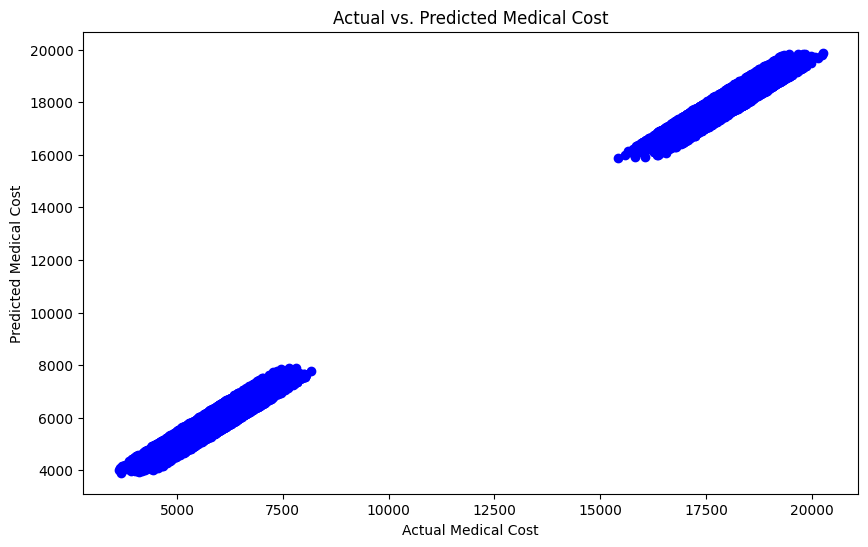

In [161]:
scores = cross_val_score(lr, x, y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

print(f'Cross-Validation RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Training and evaluating the final model on the entire dataset (optional)
lr.fit(x, y)
y_pred = lr.predict(x)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.title('Actual vs. Predicted Medical Cost')
plt.show()

iteration 2

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [163]:
numeric_features = ['Age', 'BMI', 'Children']
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_features = ['Sex', 'Smoker', 'Region']
categorical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scaler for encoded categorical variables
])

# Bundle preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Cross-Validation RMSE scores: [286.54045774 295.58988717 286.52798739 290.07433291 291.38727976]
Mean RMSE: 290.0239889927629
Standard Deviation of RMSE: 3.3822281421615346


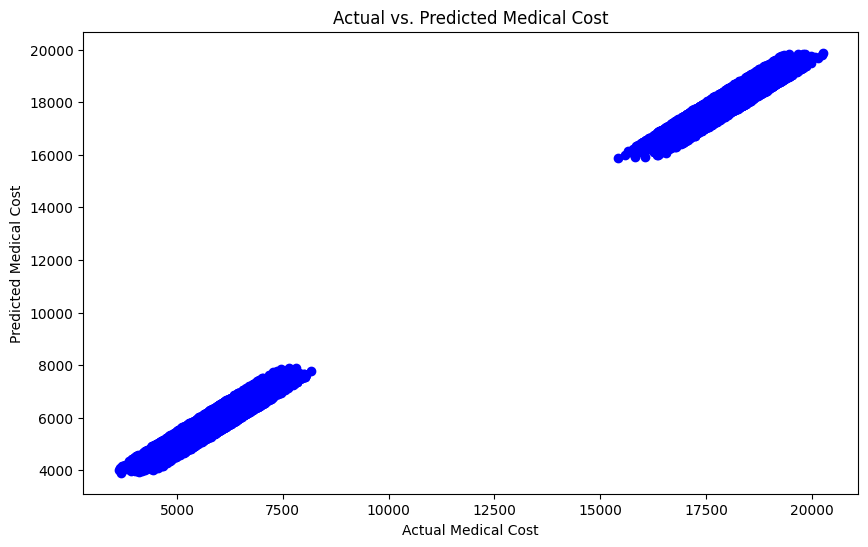

In [164]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', lr)])

# Perform cross-validation
scores = cross_val_score(pipeline, x, y, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-scores)

print(f'Cross-Validation RMSE scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')
print(f'Standard Deviation of RMSE: {rmse_scores.std()}')

# Train the model on the entire dataset and make predictions
pipeline.fit(x, y)
y_pred = pipeline.predict(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.xlabel('Actual Medical Cost')
plt.ylabel('Predicted Medical Cost')
plt.title('Actual vs. Predicted Medical Cost')
plt.show()

In [166]:
mean_cost = df['Medical Cost'].mean()
std_cost = df['Medical Cost'].std()
min_cost = df['Medical Cost'].min()
max_cost = df['Medical Cost'].max()

# Given RMSE from cross-validation
rmse_mean = 290.02

# Calculate RMSE as a percentage of mean Medical Cost
rmse_percentage = (rmse_mean / mean_cost) * 100

# Display results
print(f"Mean Medical Cost: ${mean_cost:.2f}")
print(f"Standard Deviation of Medical Cost: ${std_cost:.2f}")
print(f"Minimum Medical Cost: ${min_cost:.2f}")
print(f"Maximum Medical Cost: ${max_cost:.2f}")
print(f"RMSE: ${rmse_mean:.2f}")
print(f"RMSE as Percentage of Mean Medical Cost: {rmse_percentage:.2f}%")

Mean Medical Cost: $11898.93
Standard Deviation of Medical Cost: $6073.88
Minimum Medical Cost: $3617.09
Maximum Medical Cost: $20268.21
RMSE: $290.02
RMSE as Percentage of Mean Medical Cost: 2.44%


The RMSE of $290.02 is approximately 2.44% of the mean medical cost ($11,898.93). This relatively low percentage suggests that the average prediction error is small compared to the typical medical cost in your dataset.